In [2]:
# Librarite e perdorura 

import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imblearn.over_sampling import SMOTE

In [3]:
# Leximi i dataset-it nga source!

dataset=pd.read_csv('../data/gjobat-e-leshuara.csv')

In [4]:
# Para Procesimi

# Kontrollojme se a mungon ndonje vlere

dataset.isnull().sum()

# Ndryshimi i emrave te kolonave te caktuara

dataset.rename(columns={'LLOJI_KOMPAN': 'LLOJI_KOMPANISE', 'NR_TATIM': 'NR_TATIMIT'}, inplace=True)
print(dataset)

              VITI  MUAJI                                PERSHKRIMI_SEKTORIT  \
0          1  2020     12                                       Ndertimtaria   
1          2  2017      7                      Aktivitetet e tjera sherbyese   
2          3  2023      7                      Aktivitetet e tjera sherbyese   
3          4  2022      3  Tregtia me shumice dhe pakice; Riparimi i mjet...   
4          5  2021      4  Tregtia me shumice dhe pakice; Riparimi i mjet...   
...      ...   ...    ...                                                ...   
29702  29703  2022      1                                       Ndertimtaria   
29703  29704  2021      2                               Industria perpunuese   
29704  29705  2023      5                    Bujqesia;Pylltaria dhe Peshkimi   
29705  29706  2017      3  Tregtia me shumice dhe pakice; Riparimi i mjet...   
29706  29707  2019     10                                       Ndertimtaria   

      LLOJI_KOMPANISE        KOMUNA  PE

In [5]:
# Definimi i tipeve

print(dataset.dtypes)

                         int64
VITI                     int64
MUAJI                    int64
PERSHKRIMI_SEKTORIT     object
LLOJI_KOMPANISE         object
KOMUNA                  object
PEN_NO                   int64
PEN_TYPE_DESC_F         object
NR_TATIMIT               int64
NR_GJOBAVE               int64
VLERA                  float64
dtype: object


In [6]:
# Paraqitja e numrit te rreshtave dhe kolonave

dataset.shape

(29707, 11)

In [7]:
# Integrimi

dataset['MUAJI/VITI'] = dataset['MUAJI'].astype(str) + '/' + dataset['VITI'].astype(str)

In [8]:
# Agregimi

Vlerat_bazuar_ne_vite = dataset.groupby('VITI')['VLERA'].sum()
print(Vlerat_bazuar_ne_vite)

VITI
2017    4493793.67
2018    5292878.74
2019    4051990.32
2020    2536865.26
2021    4527659.25
2022    5517707.53
2023    3240372.68
Name: VLERA, dtype: float64


In [9]:
# Mostrimi

gjatesia_e_mostres = 100 
mostra = dataset.sample(n=gjatesia_e_mostres, random_state=42)

print("Mostrimi random:")
print(mostra)

Mostrimi random:
              VITI  MUAJI                                PERSHKRIMI_SEKTORIT  \
8211    8212  2021      4  Tregtia me shumice dhe pakice; Riparimi i mjet...   
8218    8219  2022      7                          Transporti dhe magazinimi   
18729  18730  2020      6                    Akomodimi dhe sherbimi ushqimor   
14034  14035  2023      6                      Aktivitetet e tjera sherbyese   
13433  13434  2021      8  Tregtia me shumice dhe pakice; Riparimi i mjet...   
...      ...   ...    ...                                                ...   
5824    5825  2018      7                    Akomodimi dhe sherbimi ushqimor   
11839  11840  2020     12  Tregtia me shumice dhe pakice; Riparimi i mjet...   
9040    9041  2018      2  Tregtia me shumice dhe pakice; Riparimi i mjet...   
12691  12692  2020      7                                       Person Fizik   
4546    4547  2018      4  Tregtia me shumice dhe pakice; Riparimi i mjet...   

         LLOJI_KOMPANI

In [10]:
# Pastrimi

print("Numri i rreshtave dhe kolonave para pastrimit")
print(dataset.shape)

# Emertimi i rregullt i kolones "KOMUNA"
dataset['KOMUNA'] = dataset['KOMUNA'].str.replace('Ã‹', 'Ë')

print("Paraqitja e kolonave qe permbajne vlera null:")
print(dataset.isnull().sum())
print("\n")

print("Rreshtat duplikat:")
print(dataset.duplicated().sum())
print("\n")

#Largon kolonen e pare
dataset = dataset.drop(dataset.columns[0], axis=1)

# Outliners

# Llogarit z-scores për kolonën e përcaktuar
z_scores = (dataset['VLERA'] - dataset['VLERA'].mean()) / dataset['VLERA'].std()

# Caktimi i pragut per konsiderimin e te dhënave si outliers (p.sh., 3 devijimet standard)
pragu = 3
# Krijo një maske per te identifikuar outliers
maska_outliers = abs(z_scores) >= pragu

# Nxirr dhe printo vlerat që u larguan (outliers)
vlerat_e_larguara = dataset.loc[maska_outliers, 'VLERA']
print("Vlerat që u larguan (outliers):")
print(vlerat_e_larguara)

# Krijo një dataset të ri pa outliers
dataset = dataset[~maska_outliers]

# Shfaq informata rreth datasetit para dhe pas largimit të outliers
print(f"Forma origjinale e datasetit: {dataset.shape}")

# Zevendsimi i vlerave lowercase ne uppercase per kolonen 'KOMUNA'
dataset['KOMUNA'] = dataset['KOMUNA'].str.upper()

print("Numri i rreshtave dhe kolonave pas pastrimit")
print(dataset.shape)


Numri i rreshtave dhe kolonave para pastrimit
(29707, 12)
Paraqitja e kolonave qe permbajne vlera null:
                       0
VITI                   0
MUAJI                  0
PERSHKRIMI_SEKTORIT    0
LLOJI_KOMPANISE        0
KOMUNA                 0
PEN_NO                 0
PEN_TYPE_DESC_F        0
NR_TATIMIT             0
NR_GJOBAVE             0
VLERA                  0
MUAJI/VITI             0
dtype: int64


Rreshtat duplikat:
0


Vlerat që u larguan (outliers):
12       14000.00
41       12000.00
83       26000.00
120      12000.00
144       9000.00
           ...   
29532    19000.00
29535     9000.00
29547    37265.63
29590     8875.00
29687    10000.00
Name: VLERA, Length: 406, dtype: float64
Forma origjinale e datasetit: (29301, 11)
Numri i rreshtave dhe kolonave pas pastrimit
(29301, 11)


In [11]:
# Identifikimi

# Shtoni identifikuesin në kolonën e parë
dataset.insert(0, 'ID_UNIKE', dataset['MUAJI'].astype(str)+'/'+dataset['VITI'].astype(str) + '_' + dataset['PERSHKRIMI_SEKTORIT'] + '_' + dataset['LLOJI_KOMPANISE'])

print("Printimi i dataset-it pas insertimit te kolones unike.")
print(dataset)

Printimi i dataset-it pas insertimit te kolones unike.
                                                ID_UNIKE  VITI  MUAJI  \
0                        12/2020_Ndertimtaria_Individual  2020     12   
1        7/2017_Aktivitetet e tjera sherbyese_Individual  2017      7   
2        7/2023_Aktivitetet e tjera sherbyese_Individual  2023      7   
3      3/2022_Tregtia me shumice dhe pakice; Riparimi...  2022      3   
4      4/2021_Tregtia me shumice dhe pakice; Riparimi...  2021      4   
...                                                  ...   ...    ...   
29702                        1/2022_Ndertimtaria_SH.P.K.  2022      1   
29703             2/2021_Industria perpunuese_Individual  2021      2   
29704  5/2023_Bujqesia;Pylltaria dhe Peshkimi_Individual  2023      5   
29705  3/2017_Tregtia me shumice dhe pakice; Riparimi...  2017      3   
29706                    10/2019_Ndertimtaria_Individual  2019     10   

                                     PERSHKRIMI_SEKTORIT LLOJI_KOMPA

In [12]:
#Binarizimi
average_vlera = dataset['VLERA'].mean()

dataset['BINARIZED_VLERA'] = dataset['VLERA'].apply(lambda x: 1 if x > average_vlera else 0)

print(f"Vlera mesatare eshte: {average_vlera}")

print(dataset)

Vlera mesatare eshte: 792.1392051465821
                                                ID_UNIKE  VITI  MUAJI  \
0                        12/2020_Ndertimtaria_Individual  2020     12   
1        7/2017_Aktivitetet e tjera sherbyese_Individual  2017      7   
2        7/2023_Aktivitetet e tjera sherbyese_Individual  2023      7   
3      3/2022_Tregtia me shumice dhe pakice; Riparimi...  2022      3   
4      4/2021_Tregtia me shumice dhe pakice; Riparimi...  2021      4   
...                                                  ...   ...    ...   
29702                        1/2022_Ndertimtaria_SH.P.K.  2022      1   
29703             2/2021_Industria perpunuese_Individual  2021      2   
29704  5/2023_Bujqesia;Pylltaria dhe Peshkimi_Individual  2023      5   
29705  3/2017_Tregtia me shumice dhe pakice; Riparimi...  2017      3   
29706                    10/2019_Ndertimtaria_Individual  2019     10   

                                     PERSHKRIMI_SEKTORIT LLOJI_KOMPANISE  \
0      

In [13]:
#Zgjedhja  e nenbashkesive si veti
# Check if each unique 'PEN_NO' is associated with a unique 'PEN_TYPE_DESC_F'
is_pen_no_associated = dataset.groupby('PEN_NO')['PEN_TYPE_DESC_F'].nunique().eq(1).all()

# Print the result
print(f"Each unique 'PEN_NO' is associated with a unique 'PEN_TYPE_DESC_F': {is_pen_no_associated}")


Each unique 'PEN_NO' is associated with a unique 'PEN_TYPE_DESC_F': True


In [14]:
# Paraqitja para dhe pas e dataset-it

dataset_preprocessed = dataset.copy()
dataset=pd.read_csv('../data/gjobat-e-leshuara.csv')

#paraqitja e datasetit fillestar
print ("Dataseti fillestar:")
print(dataset)

#paraqitja e datasetit te preprocesuar
print ("Dataseti pas preprocesimit")
print (dataset_preprocessed)

Dataseti fillestar:
              VITI  MUAJI                                PERSHKRIMI_SEKTORIT  \
0          1  2020     12                                       Ndertimtaria   
1          2  2017      7                      Aktivitetet e tjera sherbyese   
2          3  2023      7                      Aktivitetet e tjera sherbyese   
3          4  2022      3  Tregtia me shumice dhe pakice; Riparimi i mjet...   
4          5  2021      4  Tregtia me shumice dhe pakice; Riparimi i mjet...   
...      ...   ...    ...                                                ...   
29702  29703  2022      1                                       Ndertimtaria   
29703  29704  2021      2                               Industria perpunuese   
29704  29705  2023      5                    Bujqesia;Pylltaria dhe Peshkimi   
29705  29706  2017      3  Tregtia me shumice dhe pakice; Riparimi i mjet...   
29706  29707  2019     10                                       Ndertimtaria   

      LLOJI_KOMPAN 

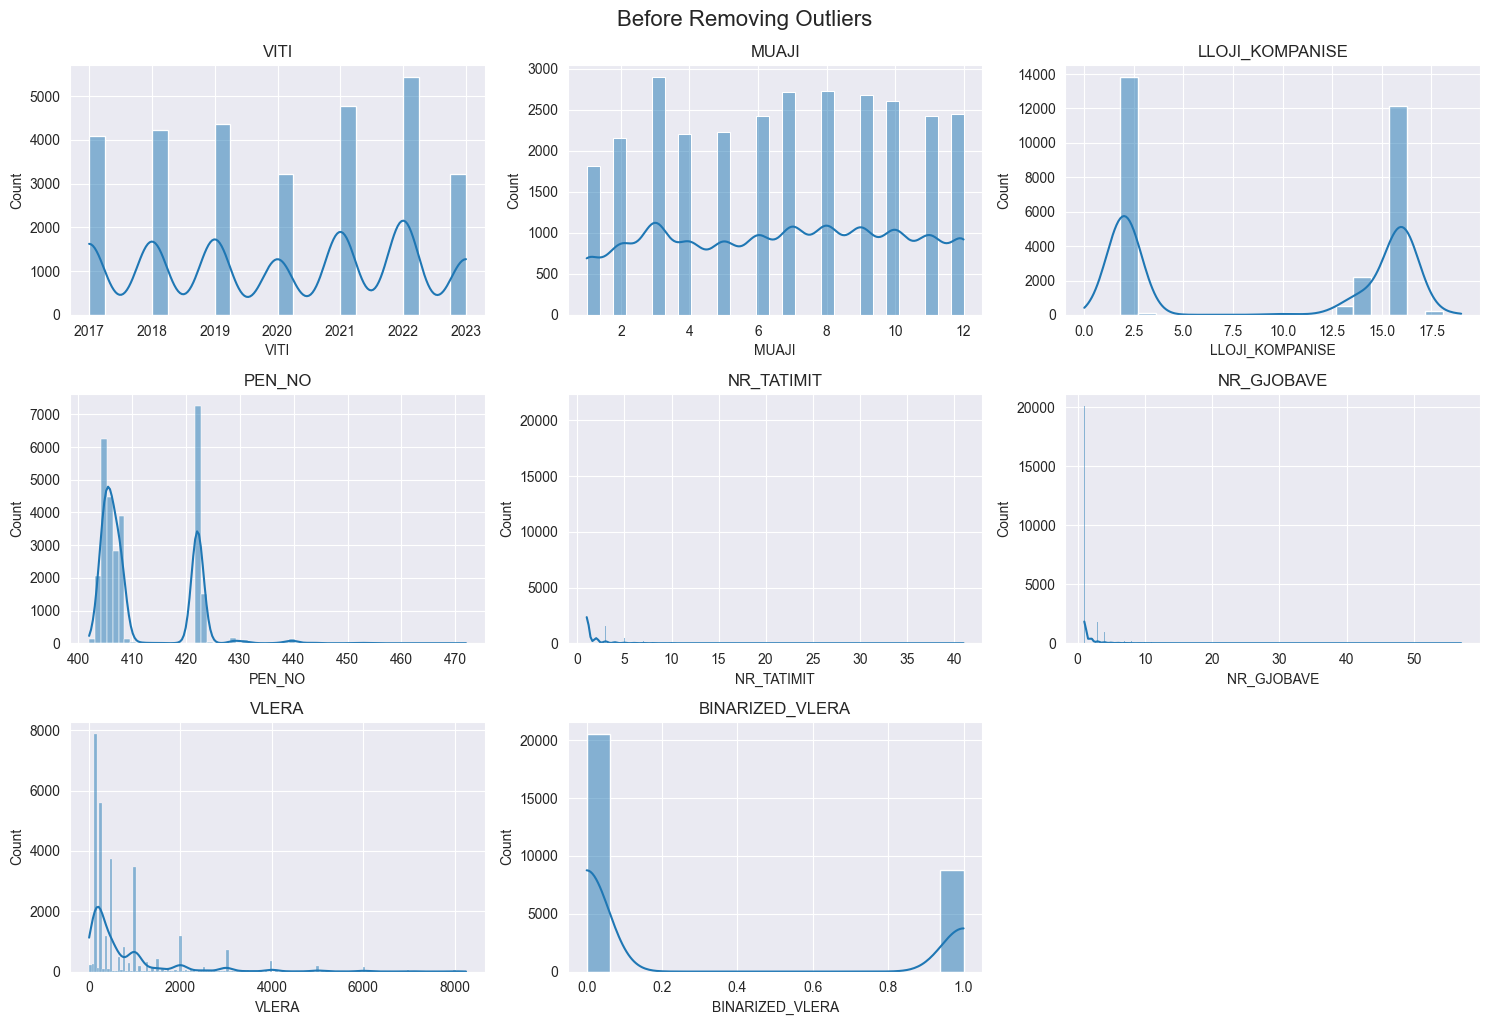

Outliers removed from the dataset:
                                                 ID_UNIKE  VITI  MUAJI  \
47     8/2018_Artet, Argetimi dhe rekreacioni_Shoqëri...  2018      8   
85     4/2019_Tregtia me shumice dhe pakice; Riparimi...  2019      4   
87     12/2019_Tregtia me shumice dhe pakice; Riparim...  2019     12   
92     4/2020_Tregtia me shumice dhe pakice; Riparimi...  2020      4   
101                    11/2017_Person Fizik_Person fizik  2017     11   
...                                                  ...   ...    ...   
29562     1/2017_Artet, Argetimi dhe rekreacioni_SH.P.K.  2017      1   
29608  5/2019_Tregtia me shumice dhe pakice; Riparimi...  2019      5   
29631       3/2023_Aktivitetet e tjera sherbyese_SH.P.K.  2023      3   
29641                  10/2021_Person Fizik_Person fizik  2021     10   
29670       6/2017_Aktivitetet e tjera sherbyese_SH.P.K.  2017      6   

                                     PERSHKRIMI_SEKTORIT  LLOJI_KOMPANISE  \
47        

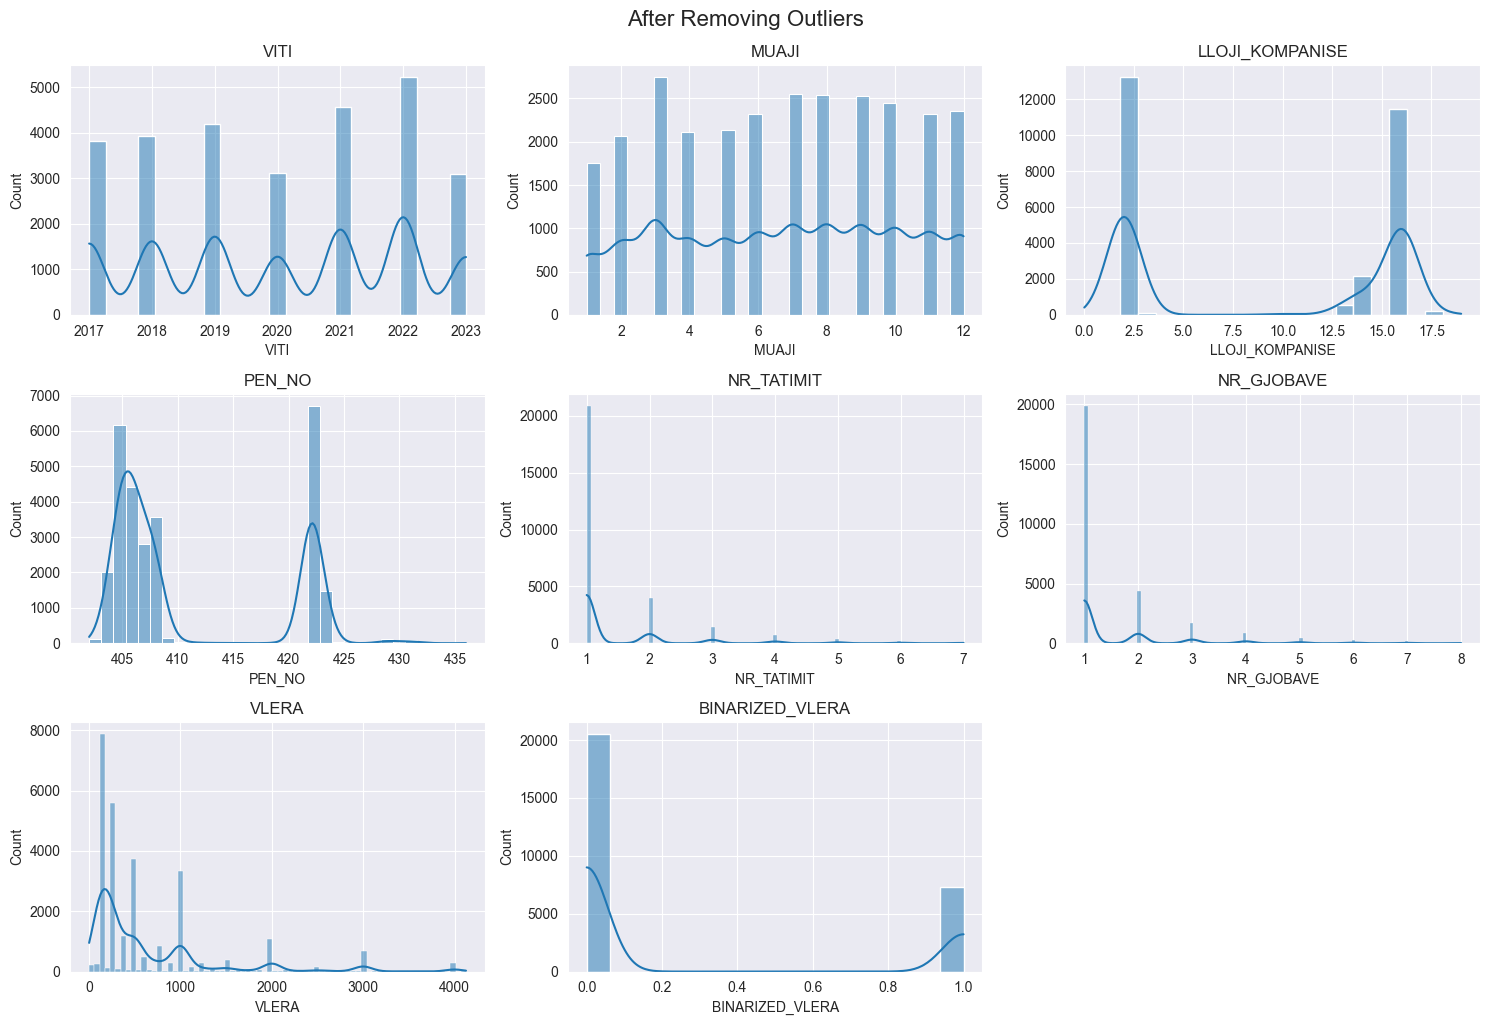

In [25]:
# 1
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
 
# Load the dataset
data = dataset_preprocessed
 
# Selecting numeric columns
numeric_columns = data.select_dtypes(include=['number']).columns
 
# Visualizing the dataset before removing outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    # sns.boxplot(y=data[column])
    sns.histplot(data[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.suptitle('Before Removing Outliers', fontsize=16, y=1.02)
plt.show()
 
# Calculating z-scores
z_scores = stats.zscore(data[numeric_columns])
abs_z_scores = np.abs(z_scores)
 
# Filtering the dataset
filtered_entries = (abs_z_scores < 3).all(axis=1)
data_cleaned = data[filtered_entries]
 
# Extracting and displaying outliers
outliers = data[~filtered_entries]
print("Outliers removed from the dataset:\n", outliers)
 
# Visualizing the dataset after removing outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_cleaned[column], kde=True)
    plt.title(column)
plt.tight_layout()
plt.suptitle('After Removing Outliers', fontsize=16, y=1.02)
plt.show()